# Post-processing 
## Ne Mg window - trained, gain 0.1-3, no log or normalization

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
parent_dir1 = os.path.abspath(os.path.join(parent_dir, '..'))
sys.path.append(parent_dir1)

import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from torch import nn
import torch.nn.functional as F
from simspice.data.SproutDataset_NeMg import SproutDataset
from torch.utils.data import DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import numpy as np
import matplotlib.pyplot as plt
from cuml.cluster.hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import simspice.utils.inverse_mapping_functions as imf
# import simspice.models.Siamese_Architecture as SA
# import simspice.models.Siamese_Architecture_Transformer as SA
import simspice.models.Siamese_Architecture_Resnet as SA
# import simspice.models.SimCLR_Architecture_Resnet as SA
#import umap.umap_ as umap
import tqdm
from datetime import datetime

plt.rcParams['image.origin'] = 'lower'

In [2]:
simspice = "/d0/tvaresano/SimSPICE/"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

id = 'resnet50_SimSiam_NeMg_gain01-3'

Unique Clusters in file: 26


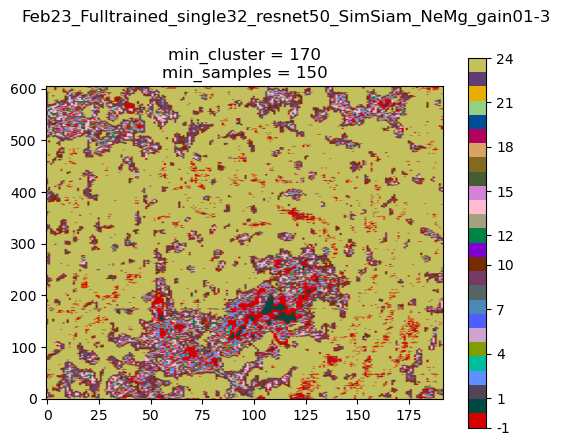

In [3]:
x,y = 170,150
labels = np.load(simspice+f'notebooks/jobs/clustering/Fulltrained_single32_{id}_minclus{x}_minsamp{y}.npy')
imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc')
plt.title(f"min_cluster = {x}\nmin_samples = {y}")
plt.suptitle(f'Feb23_Fulltrained_single32_{id}')
plt.show()

## Distribution of number of pixels by cluster

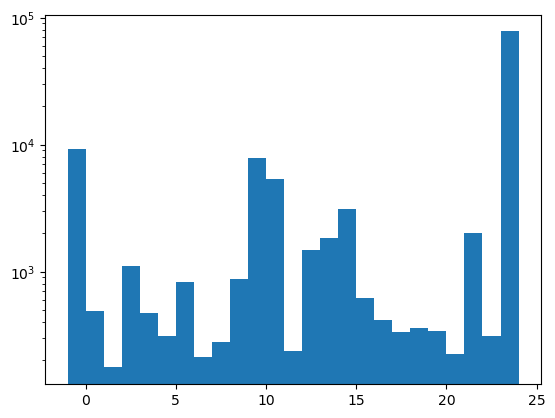

In [4]:
plt.hist(labels.flatten(), bins='fd');
plt.yscale('log')

In [5]:
dataset_path = simspice+"/spectra_Feb2023_NeMg.nc"
dataset_none = SproutDataset(dataset_path=dataset_path, augmentation_type=None, csv_files=simspice+'L2_names.csv',
                                           log_space=False, normalize_intensity=False)

stacked_outputs = np.load(simspice+f'notebooks/jobs/model_outputs/stacked_outputs_single32_full_{id}.npy')

## Plot contours and mean spectra

Unique Clusters in file: 26
solo_L2_spice-n-ras_20230211T153421_V22_167772557-000.fits
labels shape:  (116160, 1)
Unique Clusters in file: 26
solo_L2_spice-n-ras_20230211T153421_V22_167772557-000.fits
labels shape:  (116160, 1)


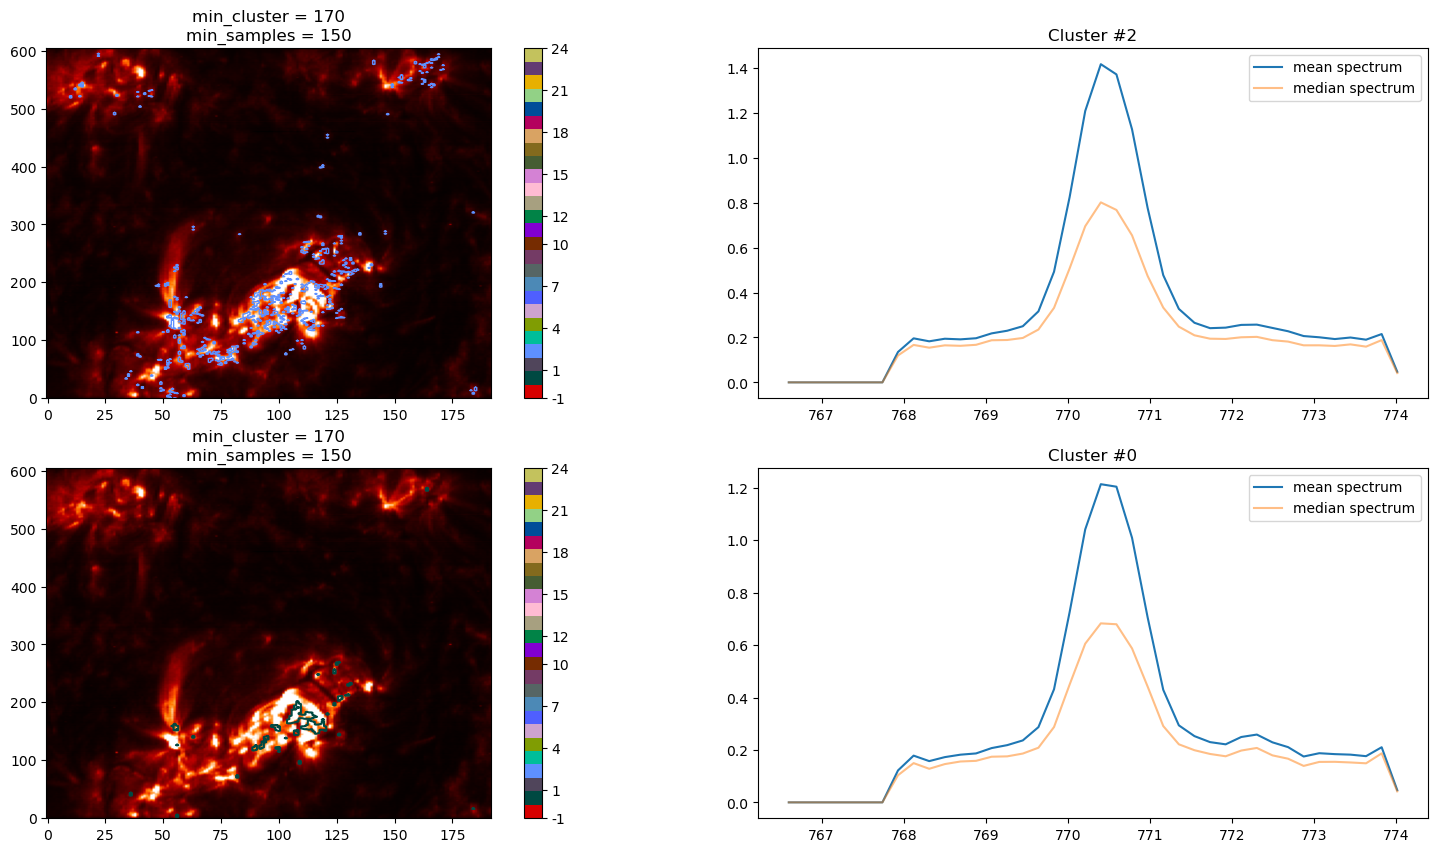

In [9]:
# imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc', selected_clusters=[-1])
# plt.title(f"min_cluster = {x}\nmin_samples = {y}")
# plt.suptitle(f'Feb23_Fulltrained_single32_{id}')
# plt.show()

# imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc', selected_clusters=[0,1,2,10,23,24])
# plt.title(f"min_cluster = {x}\nmin_samples = {y}")
# plt.suptitle(f'Feb23_Fulltrained_single32_{id}')
# plt.show()

plt.figure(figsize=(19,10))
plt.subplot(2,2,1)
imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc', selected_clusters=[2], 
                 contour=True, data_dir='/d0/tvaresano/SimSPICE/data_L2/Feb2023/')
plt.title(f"min_cluster = {x}\nmin_samples = {y}")

plt.subplot(2,2,2)
imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=2, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)

plt.subplot(2,2,3)
imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc', selected_clusters=[0], 
                 contour=True, data_dir='/d0/tvaresano/SimSPICE/data_L2/Feb2023/', linewidth=1.5)
plt.title(f"min_cluster = {x}\nmin_samples = {y}")

plt.subplot(2,2,4)
imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=0, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)
plt.show()

labels shape:  (116160, 1)


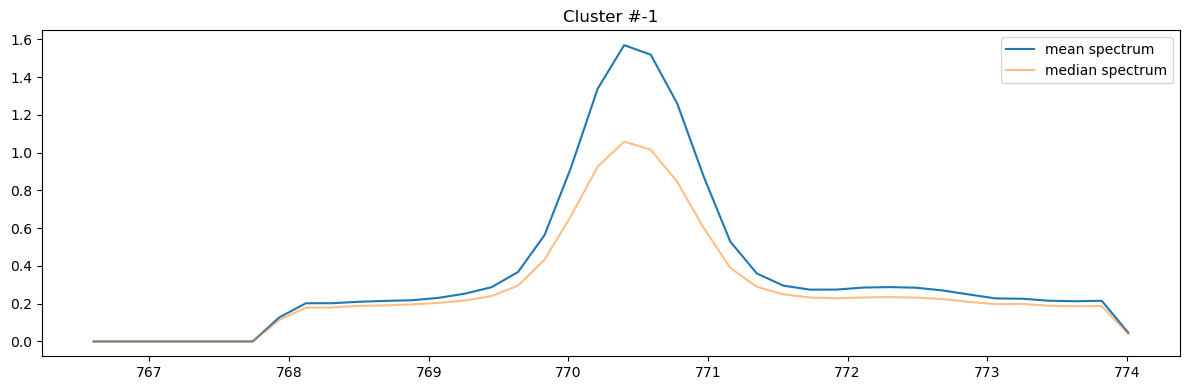

labels shape:  (116160, 1)


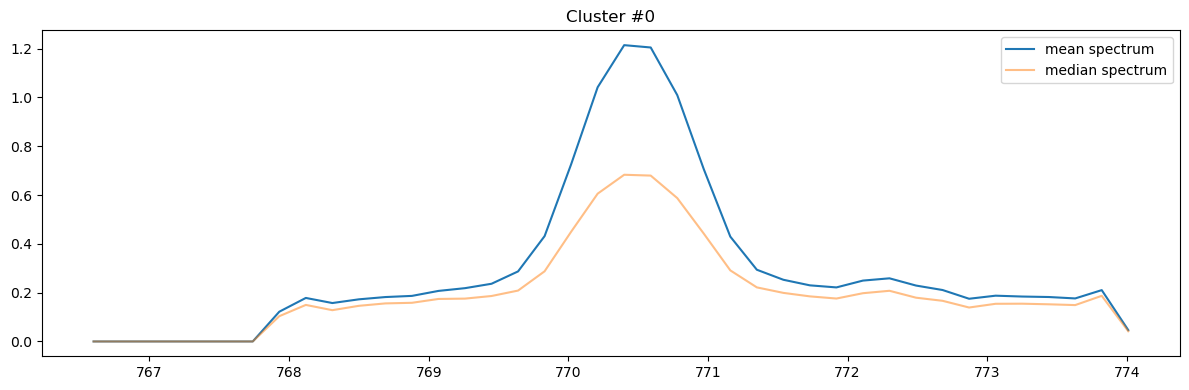

labels shape:  (116160, 1)


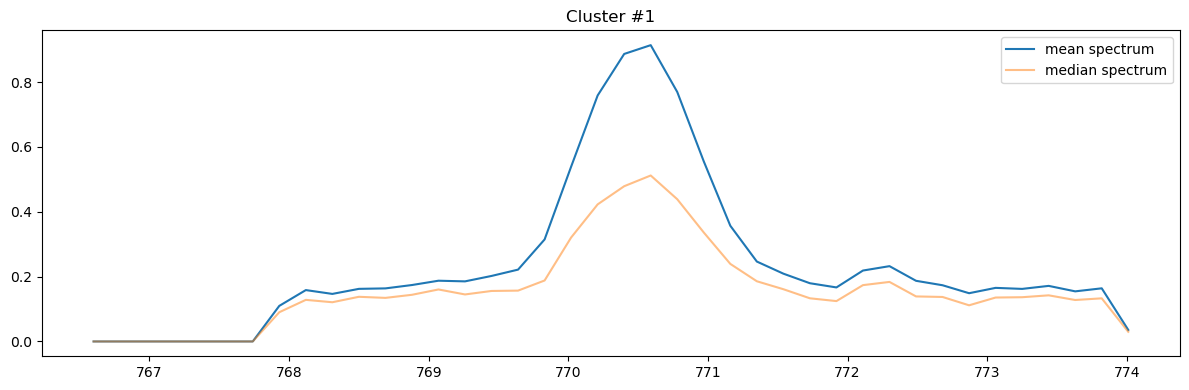

In [ ]:

imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=-1, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)
plt.show()
imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=0, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)
plt.show()
imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=1, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)
plt.show()

labels shape:  (116160, 1)


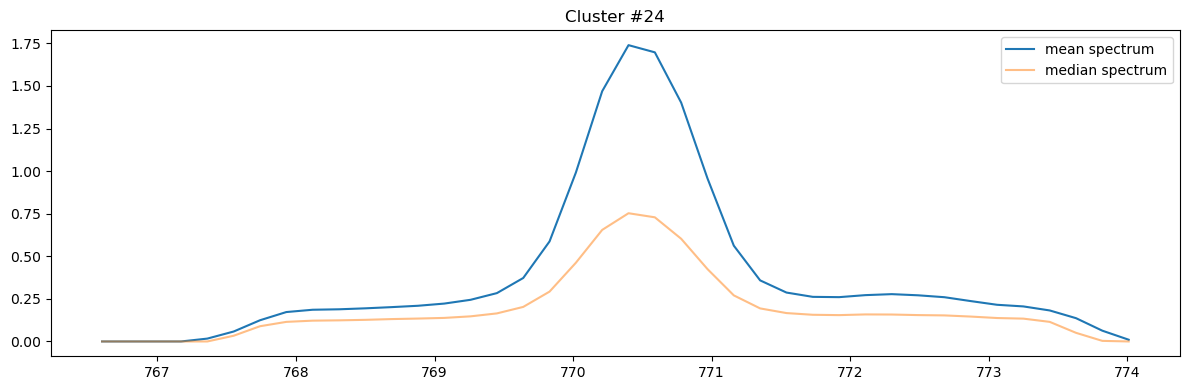

labels shape:  (116160, 1)


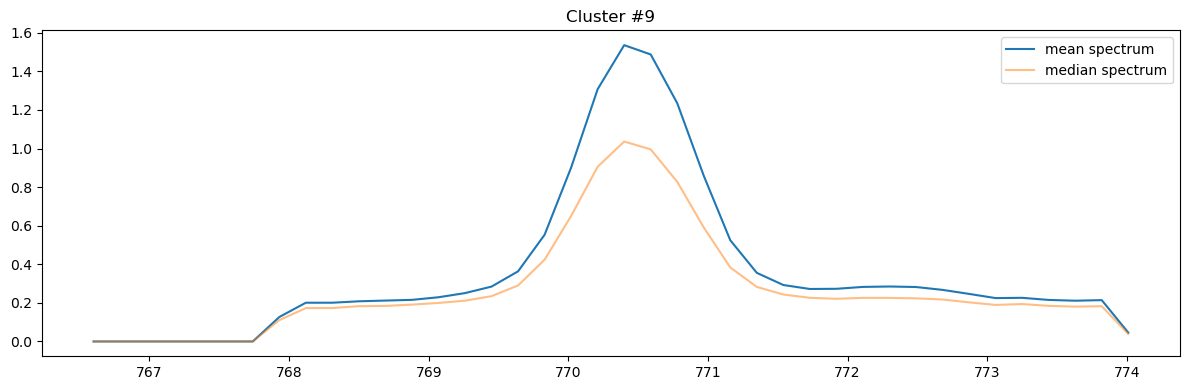

In [16]:
imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=24, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)
plt.show()
imf.plot_average_spectra_cluster(labels, stacked_outputs, chosen_cluster=9, 
                                    dataset=dataset_none, log_scale=False,
                                    dataset_path=dataset_path, wvl=imf.WAVELENGTHS_ARRAY_NEMG)
plt.show()